# Auswertung der Rohdaten

Ergebnisse der Umfrage zum Klimaneutralen Stromsystem / Erneuerbaren Energiesystem.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# Einstellungen zur Darstellung
# Farbpalette (kann später mit eigenen Farben angepasst werden)
# https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html
cmap = cm.get_cmap('viridis')

In [24]:
# Gruppierung der Ergebnisse
links = ['E-Mailverteiler', 'internes-Netzwerk', 'Pressemitteilung']
states = ['vollständig', 'abgebrochen']
# Für Grafiken
nrows = len(states)
ncols = len(links)

In [21]:
# Laden der Umfrageergebnisse
# Funktion zum Bereinigen der Ergebnisse
def cleanse(df):
    mask = (df['duration']>0) \
        & (df['lastpage']>0) \
        & (df['dispcode'].isin([31,32,33,34,22]))
    return df.loc[mask]

# Funktion zum Laden, Filtern und Bereinigen der Daten
def load_df(link, skipped):
    df = pd.read_csv('data/2022_06_RLI_Klimaneutrales Stromsystem_{}_Ergebnisse.csv'.format(link),
                     sep=';', header=2, usecols=list(range(3,123)))
    df = cleanse(df)
    skip_codes = [22] if skipped else [31,32,33,34]
    return df.loc[df['dispcode'].isin(skip_codes)]

# Tabelle mit Datentabellen
data = pd.DataFrame(data={link: [load_df(link, skip) for skip in range(len(states))]
                          for link in links},
                    index=states)
# Access a DataFrame with df.loc[<vollständig/abgebrochen>, <Umfragelink-typ>]

## Generelle Angaben zu den Ergebnisgruppen

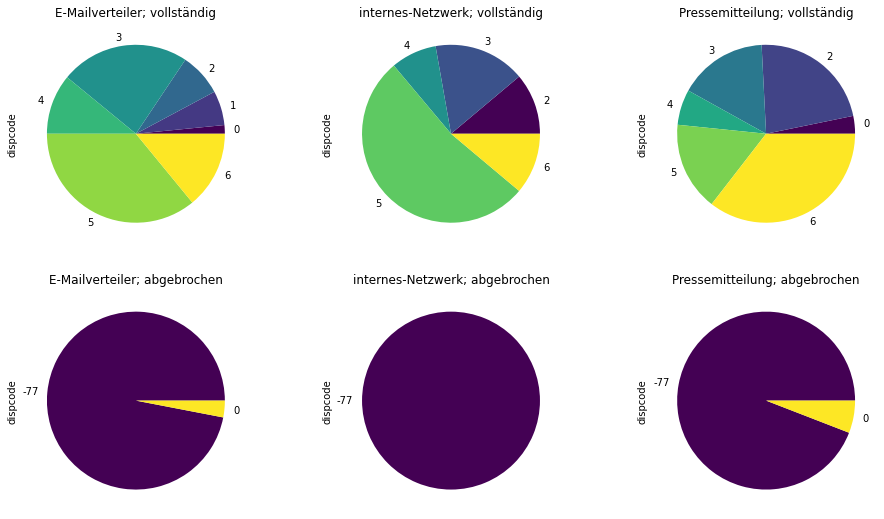

In [34]:
fig, ax = plt.subplots(nrows, ncols, figsize=(16,9))
for i in range(nrows):
    for j in range(ncols):
        data.iloc[i,j].groupby('v_296').count()['dispcode'].plot.pie(ax=ax[i,j], cmap=cmap)
        ax[i,j].set_title(links[j] + '; ' + states[i])

In [33]:
print('Average years of experience:')
for l in links:
    for s in states:
        print('{}; {}: {}'.format(l,s, np.round(data.loc[s,l].loc[
            data.loc[s,l]['v_306']>-77, 'v_306'].mean(),
                                                1)))

Average years of experience:
E-Mailverteiler; vollständig: 12.1
E-Mailverteiler; abgebrochen: nan
internes-Netzwerk; vollständig: 10.7
internes-Netzwerk; abgebrochen: nan
Pressemitteilung; vollständig: 17.1
Pressemitteilung; abgebrochen: nan
